In [560]:
#TAREA 6 - MÉTODOS COMPUTACIONALES I
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy.special import comb
import pandas as pd
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement


In [561]:
#TEOREMA DE BAYES

In [562]:
#Ejercicio 2
#a)
Estudiantes = np.array([1.,2.,3.,4.])
Priori = np.array([0.4,0.3,0.2,0.1]) #Distribuciones de probabilidad a priori
Valor_Esperado = np.sum(Priori*Estudiantes)
Valor_Esperado

np.float64(2.0)

In [563]:
#b)
Likelihood = lambda x: (Estudiantes**x)*(np.exp(-Estudiantes))/math.factorial(x)
Verosimilitud = Likelihood(4)
Verosimilitud

array([0.01532831, 0.09022352, 0.16803136, 0.19536681])

In [564]:
#c)
Posterior = Verosimilitud*Priori/np.sum(Verosimilitud*Priori)
Posterior

array([0.07101262, 0.31348898, 0.38922576, 0.22627264])

In [565]:
#d)
print(f"La distribucion está normalizada porque la suma de las posteriores es {np.sum(Posterior)}")

La distribucion está normalizada porque la suma de las posteriores es 1.0


In [566]:
#e) El modelo que más probablemente explica los datos es el de 3 estudiantes

In [567]:
#f)
Mejor_Distribucion = Posterior*Estudiantes
Mejor_Parametro = np.sum(Mejor_Distribucion)
Mejor_Parametro

np.float64(2.7707584253176796)

In [568]:
#Ejercicio 3)
#a) El parametro esperado a priori es el mismo, 2.0
#b)
Verosimilitud5 = Likelihood(5)
Verosimilitud5
VerosimilitudConjunta = Verosimilitud*Verosimilitud5
VerosimilitudConjunta

array([4.69914178e-05, 3.25611358e-03, 1.69407219e-02, 3.05345539e-02])

In [569]:
#c)
PosteriorConjunta = VerosimilitudConjunta*Priori/np.sum(VerosimilitudConjunta*Priori)
PosteriorConjunta

array([0.00252736, 0.1313438 , 0.45556534, 0.41056351])

In [570]:
#d)
np.sum(PosteriorConjunta)

np.float64(1.0)

In [571]:
#f)
Mejor_DistribucionConjunta = PosteriorConjunta*Estudiantes
Mejor_ParametroConjunta = np.sum(Mejor_DistribucionConjunta)
Mejor_ParametroConjunta

np.float64(3.274164986959538)

In [572]:
#Ejercico 4)
#a)
Densidad = np.array([1/2,1/4,1/4])
Densidad

array([0.5 , 0.25, 0.25])

In [573]:
#b)
Eficiencia = np.array([0.9,0.6,0.2])
PD = np.sum(Densidad*Eficiencia)
PD

np.float64(0.65)

<StemContainer object of 3 artists>

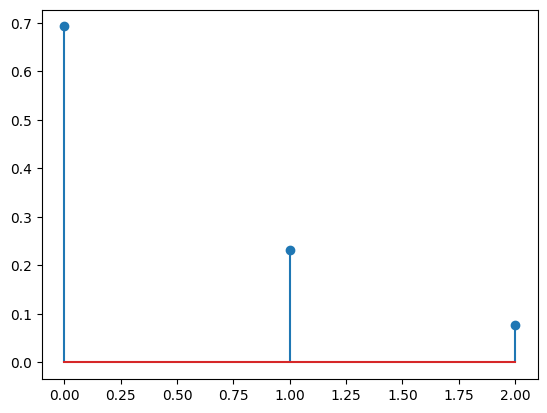

In [574]:
#c)
Posterior = np.round(Eficiencia*Densidad/PD,4)
plt.stem(Posterior)

In [575]:
#d) 
print(f"La probabilidad de que detecte un electrón es de {Posterior[0]}, que sea un protón es de {Posterior[1]}, y alpha {Posterior[2]}")

La probabilidad de que detecte un electrón es de 0.6923, que sea un protón es de 0.2308, y alpha 0.0769


In [576]:
#GENERALES DE PROBABILIDAD

Text(0, 0.5, 'Probabilidad')

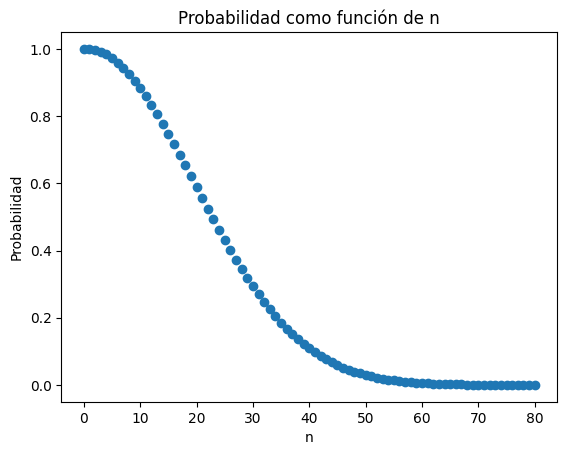

In [602]:
#4)
#Formula general
Diferentes = lambda n: (math.factorial(365))/((365**n)*(math.factorial(365-n))) #Formula general del calculo
Probabilidad = []
for n in range(81): #range excluye el ultimo valor
    Probabilidad.append(Diferentes(n))
plt.scatter(np.arange(0,81),Probabilidad) #arange excluye el ultimo valor
plt.title("Probabilidad como función de n")
plt.xlabel("n")
plt.ylabel("Probabilidad")

In [578]:
#Para que vea que la formula es correcta, para 23 personas la formula arroja el mismo resultado que el video:
Diferentes(23)

0.4927027656760146

In [579]:
#6)
#Número de experimentos
N = int(1e5)
#Armemos un contador
contador = 0
#Realicemos el experimento
for _ in range(N):
    resultado = np.random.randint(1,7,3) #3 dados, excluye el 7, osea valores de 1 a 6
    valores = np.unique(resultado)
    if len(valores) == 2:
        contador += 1
Probabilidad_experimental = contador/N
print(f"La probabilidad calculada con el experimento fue {Probabilidad_experimental}, muy cercana a 5/12=0.4167")

La probabilidad calculada con el experimento fue 0.41865, muy cercana a 5/12=0.4167


In [580]:
#7)
from collections import Counter
#Número de experimentos para a y b
N = int(1e5)
#Armemos un contador para a
contador_a = 0
#Realicemos el experimento a
for _ in range(N):
    resultado = np.random.randint(1,7,5) #5 dados, excluye el 7, osea valores de 1 a 6
    valores = np.unique(resultado)
    if len(valores) == 4: #La lista debe ser de longitud 5-1 (de 1 par) = 4
        contador_a += 1
P_a = contador_a/N
#Armemos un contador para b
contador_b = 0
#Realicemos el experimento b
for _ in range(N):
    resultado = np.random.randint(1,7,5) #5 dados, excluye el 7, osea valores de 1 a 6
    _, conteo = np.unique(resultado,return_counts=True)
    conteo = np.sort(conteo)
    if np.array_equal(conteo, [1, 2, 2]): #La lista debe ser de longitud 5-2 (de 2 pares) = 3 y que haya 1,2,2 ocurrencias
        contador_b += 1
P_b = contador_b/N
#Para c), calculemos la probabilidad a mano:
posibles_c = 6**5
favorables_c = 6*5*comb(5,4)
print(f"P(A)={contador_a/N} según el experimento, que es parecido a P(A)=25/54=0.463")
print(f"P(B)={contador_b/N} según el experimento, que es parecido a P(B)=25/108=0.231")
print(f"P(C)={favorables_c/posibles_c}, que es igual a 25/1296")

P(A)=0.46412 según el experimento, que es parecido a P(A)=25/54=0.463
P(B)=0.22882 según el experimento, que es parecido a P(B)=25/108=0.231
P(C)=0.019290123456790122, que es igual a 25/1296


Text(0, 0.5, 'S(N,x)/kN')

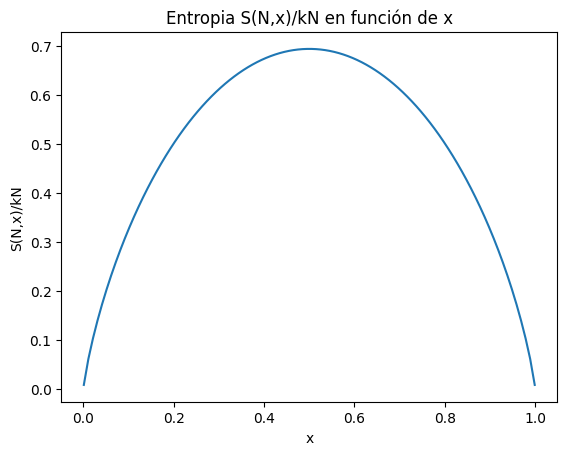

In [603]:
#Ejercicio 12 dibujo inciso d)
entropia = lambda x: -x*np.log(x) - (1-x)*np.log(1-x)
x = np.linspace(0.001,.999,100)
plt.plot(x,entropia(x))
plt.title("Entropia S(N,x)/kN en función de x")
plt.xlabel("x")
plt.ylabel("S(N,x)/kN")

In [582]:
#HIDDEN MARKOV MODELS (Ejercicio 1)
#a)
priori = np.array([0.2,0.8])
T = np.array([[0.8, 0.2], 
              [0.2, 0.8]])
E = np.array([[0.5, 0.9], 
              [0.5, 0.1]])
Estados = np.array([0,1])
DictHidden = {0:'Justa',1:'Sesgada'}
DictObservado = {0:'Cara',1:'Sello'}

#b)
ObservadoSimbolo = ["S","C","C","C","S","C","S","C"]
Observado = [1, 0, 0, 0, 1, 0, 1, 0]

def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))
    Permu = []
    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)
    CStates = np.array(Permu)
    return CStates

Ocultos = GetStates(Estados, 8)

def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.
  # Probabilidad a priori
  p *= Prior[State[0]] #State[0] es el primer estado oculto en la cadena (0 o 1)

  for i in range(n-1): # El ultimo no va a ningun lado (se empezó con el prior)
    p *= T[State[i+1], State[i]] #La fila es el estado al que llego, la columna del que salgo.

  for i in range(n): #Para este NO hay prior, solo para los estados ocultos
    p *= E[ Obs[i], State[i] ] 

  return p

ProbabilidadesOcultos = np.zeros(Ocultos.shape[0])

for i in range(ProbabilidadesOcultos.shape[0]):
  ProbabilidadesOcultos[i] = GetProb(T, E, Observado, Ocultos[i], priori) 
  #Probabilidades de todos los estados ocultos posibles para lo observado

IndiceMasProbable = np.where(ProbabilidadesOcultos == np.max(ProbabilidadesOcultos))
OcultoMasProbable = []
for ind in Ocultos[IndiceMasProbable][0]:
  OcultoMasProbable.append(DictHidden[ind])
print(f"La secuencia oculta más probable para {Observado} es {OcultoMasProbable} con probabilidad {round(ProbabilidadesOcultos[IndiceMasProbable][0],6)}")

La secuencia oculta más probable para [1, 0, 0, 0, 1, 0, 1, 0] es ['Sesgada', 'Sesgada', 'Sesgada', 'Sesgada', 'Justa', 'Justa', 'Justa', 'Justa'] con probabilidad 0.000191


In [583]:
#c)
EstadosObservables= GetStates([0,1],8) #Todos los estados OBSERVABLES POSIBLES
NumeroObservables = EstadosObservables.shape[0]
ProbabilidadObservables = np.zeros(NumeroObservables)

for j in range(NumeroObservables):
  dim = Ocultos.shape[0] #Todos los estados observables de 3 tienen los mismos estados ocultos posibles
  P = np.zeros(dim)
  for i in range(dim):
    P[i] = GetProb(T,E,EstadosObservables[j],Ocultos[i],priori)

  ProbabilidadObservables[j] = np.sum(P) #La suma de las probabilidades de todos los estados ocultos es la probabilidad del estado observable

ProbabilidadObservables

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

Text(0.5, 1.0, 'Probabilidad por secuencia observable')

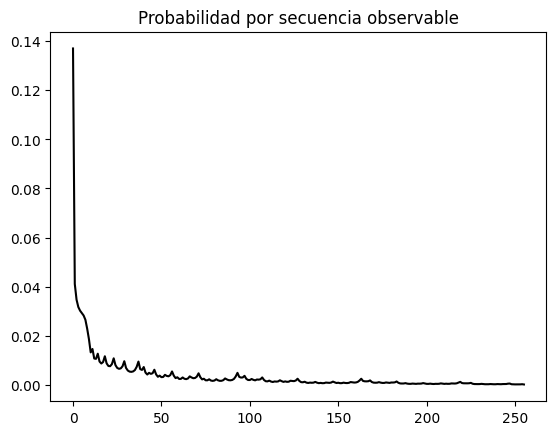

In [584]:
plt.plot(range(NumeroObservables), ProbabilidadObservables, color="k")
plt.title("Probabilidad por secuencia observable")

In [585]:
#d)
print(f"La suma de probabilidad de todos los estados observables es {np.sum(ProbabilidadObservables)}")
#e) No, la suma de probabilidad de los estados observables es siempre 1. Lo que si cambia es la probabilidad 
# de cada secuencia oculta, y por lo tanto de cada secuencia observable.

La suma de probabilidad de todos los estados observables es 1.0000000000000007


In [586]:
#MUESTREO
#7)
file = open("Matematicas.txt")
data = pd.read_csv(file)
#a)
Media = np.mean(data)
Media

np.float64(75.25)

In [587]:
#b)
Mediana = np.percentile(data, 50)
Mediana

np.float64(75.0)

In [588]:
#c)
ordenado = np.sort(data["Datos"])
_, frecuencia = np.unique(ordenado, return_counts=True)
frecuencia_acumulada = frecuencia.cumsum()
probabilidad_acumulada = frecuencia_acumulada/np.sum(frecuencia)
frecuencia_acumulada, probabilidad_acumulada

(array([ 1,  2,  3,  6,  8, 12, 14, 17, 18, 20, 23, 24, 27, 29, 33, 36, 43,
        47, 49, 54, 57, 58, 59, 61, 62, 63, 66, 67, 68, 71, 72, 73, 75, 76,
        78, 79, 80]),
 array([0.0125, 0.025 , 0.0375, 0.075 , 0.1   , 0.15  , 0.175 , 0.2125,
        0.225 , 0.25  , 0.2875, 0.3   , 0.3375, 0.3625, 0.4125, 0.45  ,
        0.5375, 0.5875, 0.6125, 0.675 , 0.7125, 0.725 , 0.7375, 0.7625,
        0.775 , 0.7875, 0.825 , 0.8375, 0.85  , 0.8875, 0.9   , 0.9125,
        0.9375, 0.95  , 0.975 , 0.9875, 1.    ]))

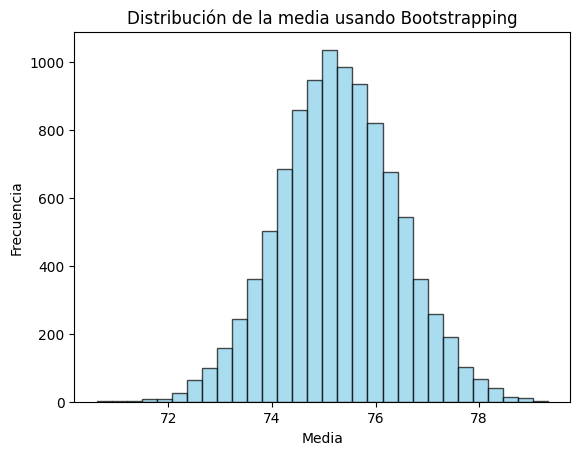

In [589]:
#d)
import random
tamano = 80
muestras = 10000
promedios = []
for _ in range(muestras):
    muestra_bootstrap = random.choices(ordenado, k=tamano)  # Generamos una muestra bootstrap
    media_muestra = np.mean(muestra_bootstrap)  # Calculamos la media de la muestra
    promedios.append(media_muestra)

plt.hist(promedios, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de la media usando Bootstrapping')
plt.xlabel('Media')
plt.ylabel('Frecuencia')
plt.show()

In [590]:
import emcee
import corner

  0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15260\1947684444.py:17: RuntimeWarning: divide by zero encountered in log
  return +np.sum(np.log(Likelihood(p,x)))
100%|██████████| 10000/10000 [01:00<00:00, 165.35it/s]


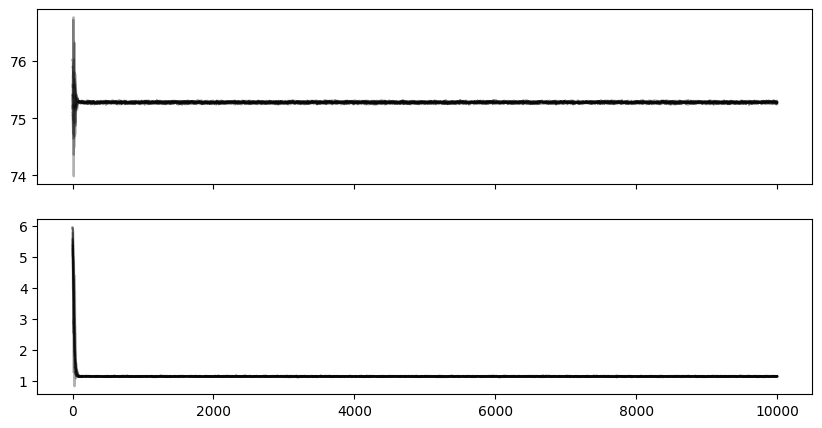

In [591]:

#e) Fit Gaussiano
def LogPrior(p):
    mu, sigma = p
    if 70.0 < mu < 80.0 and 0.0 < sigma < 10.0:
        return 0.0
    else:
        return -np.inf
    
def Gauss(p,x):
    mu, sigma = p
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

def Likelihood(p,x):
    return Gauss(p,x)

def JointLikelihood(p,x):
    return +np.sum(np.log(Likelihood(p,x)))

def LogPosterior(p,x):
    LogP = LogPrior(p)
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return LogP + JointLikelihood(p,x)

n_walkers, n_params = 10,2
p0 = np.zeros((n_walkers, n_params))
p0[:,0] = 75
p0[:,1] = 5
p0 += np.random.rand(n_walkers, n_params)
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(promedios,))
pos,prob,state = sampler.run_mcmc(p0,10000,progress=True)
fig, axes = plt.subplots(2, figsize=(10,5), sharex=True)

samples = sampler.get_chain()
labels = ["mu", "sigma"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)


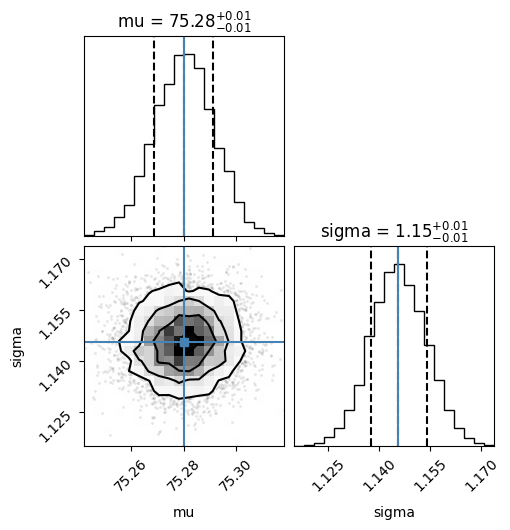

In [592]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
figure = corner.corner(flat_samples, labels=["mu", "sigma"], truths=truths, quantiles=[0.16, 0.5, 0.84], show_titles=True)

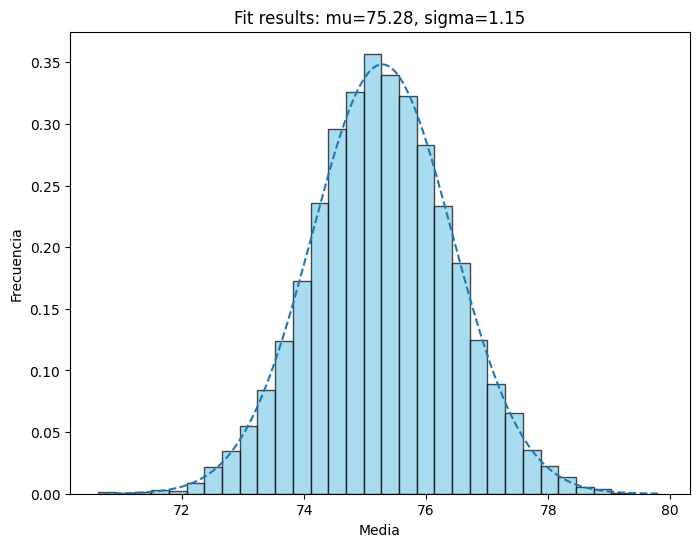

El valor de la media es 75.28 con desviacion estandar 1.15


In [593]:
mu = truths[0]  # media
sigma = truths[1]  # desviación estándar

# Crear un rango de valores de x (por ejemplo, de 50 a 100)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calcular la función de densidad de probabilidad (PDF) de la normal
y = Gauss(np.array([mu, sigma]), x)

# Graficar la distribución normal
plt.figure(figsize=(8, 6))
plt.plot(x, y, linestyle="--")
plt.hist(promedios, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
plt.title(f'Fit results: mu={round(mu,2)}, sigma={round(sigma,2)}')
plt.xlabel('Media')
plt.ylabel('Frecuencia')
plt.show()
print(f"El valor de la media es {round(mu,2)} con desviacion estandar {round(sigma,2)}")

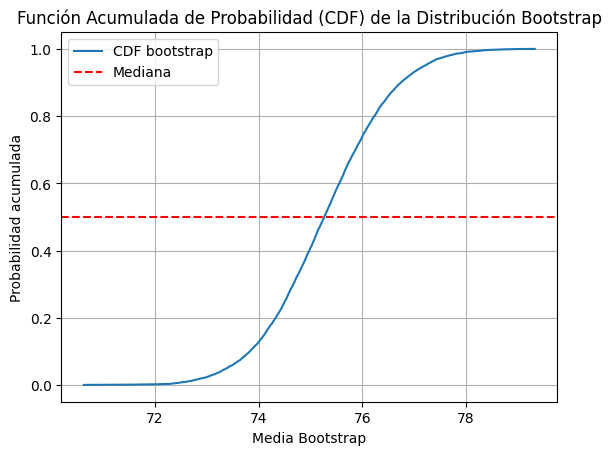

El valor de la mediana de la distribución bootstrap es 75.275


In [594]:
#f)
ordenadoboot = np.sort(promedios)
_, frecuenciaboot = np.unique(ordenadoboot, return_counts=True)
frecuencia_acumuladaboot = frecuenciaboot.cumsum()
probabilidad_acumuladaboot = frecuencia_acumuladaboot/np.sum(frecuenciaboot)
plt.plot(np.unique(ordenadoboot), probabilidad_acumuladaboot, label="CDF bootstrap")
plt.axhline(0.5, color='r', linestyle='--', label="Mediana")
plt.title("Función Acumulada de Probabilidad (CDF) de la Distribución Bootstrap")
plt.xlabel("Media Bootstrap")
plt.ylabel("Probabilidad acumulada")
plt.legend()
plt.grid(True)
plt.show()
medianaboot = np.percentile(ordenadoboot,50)
print(f"El valor de la mediana de la distribución bootstrap es {medianaboot}")

In [595]:
#g) Ambos resultados parecen ser consistentes, entre 75.1 y 75.3.

In [596]:
#EJERCICIO 11
N = int(1e4)
X1 = np.random.gamma(2, 3, N)  
X2 = np.random.normal(5, np.sqrt(2), N) 
X3 = np.random.uniform(0, 10, N)
X = X1 + 2*X2 - X3
#a) El primer momento es la media y el segundo momento es la varianza:
PMa = np.mean(X)
SMa = np.var(X)
PMa, SMa

(np.float64(11.02969103902457), np.float64(34.962926944213805))

In [604]:
#b)
a = np.array([1.,2.,-1.])
EXv = np.array([np.mean(X1),np.mean(X2),np.mean(X3)])
CovXv = np.cov(np.array([X1,X2,X3]))
PMb = np.dot(a.T, EXv)
SMb = np.dot(a.T, np.dot(CovXv,a))
PMb, SMb

(np.float64(11.029691039024573), np.float64(34.966423586572475))

In [598]:
#c) Coeficientes de correlación de Pearson
M1 = np.cov(np.array([X,X1]))
C1 = M1[0,1]/np.sqrt(M1[0,0]*M1[1,1])
M2 = np.cov(np.array([X,X2]))
C2 = M2[0,1]/np.sqrt(M2[0,0]*M2[1,1])
M3 = np.cov(np.array([X,X3]))
C3 = M3[0,1]/np.sqrt(M3[0,0]*M3[1,1])
print(f"Los coeficientes de correlación de pearson son: X1->{C1},X2->{C2},X3->{C3}")

Los coeficientes de correlación de pearson son: X1->0.7225233535960542,X2->0.49174530847896214,X3->-0.49917344854658097


In [ ]:
#El inciso d) está en el pdf

In [606]:
#MÉTODO DE MONTECARLO
#6)
puntos = []
N = 1000
for i in range(N):
    u = np.random.uniform(0.,1.)
    v = np.random.uniform(0.,1.)
    r = np.random.uniform(0.,1.)**(1/3)
    phi = np.arccos(2*v - 1)
    theta = 2*np.pi*u
    puntos.append([r*np.cos(theta)*np.sin(phi), r*np.sin(theta)*np.sin(phi), r*np.cos(phi)])
puntos = np.array(puntos)
Ixx = np.sum(puntos[:,1]**2 + puntos[:,2]**2)/N
Iyy = np.sum(puntos[:,0]**2 + puntos[:,2]**2)/N
Izz = np.sum(puntos[:,0]**2 + puntos[:,1]**2)/N
Ixx, Iyy, Izz
#Los resultados están cerca de 2/5

(np.float64(0.3915505185441557),
 np.float64(0.3987597192010076),
 np.float64(0.39453871080884156))

In [607]:
Ixy = -np.sum(puntos[:,0]*puntos[:,1])/10000
Ixy
#El momento de inercia Ixy da cero. Por lo que, respecto a su simetría de rotación, se puede concluir que la esfera 
# es invariante bajo rotaciones, lo que significa que sus momentos de inercia son iguales en todas las direcciones

np.float64(-0.00071551499567045)

In [612]:
#9) De acuerdo a la formula 8.22, N=1/incertidumbre^2 = 1/0.01^2 = 1/0.0001 = 10000
f = lambda x: (math.factorial(5)/(math.factorial(1)*math.factorial(3)))*x*(1-x)**3
lista = []
for i in range(10000):
    xi = np.random.uniform(0,1)
    yi = np.random.uniform(0,2.11)
    if yi < f(xi):
        lista.append(xi) 
prob = len(lista)/10000
area = 2.11*prob
area
#El area es aproximadamente 1.

1.00436